# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Import and initialize variables

In [1]:
import pickle
import os.path 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import numpy as np
from sklearn.utils import shuffle
import cv2
import time
import tensorflow as tf
from tensorflow.contrib.layers import flatten



# # #

EPOCHS = 10
BATCH_SIZE = 128
IMAGE_SIZE = 32
NUM_CLASSES = 43
rate = 0.001 # Learning rate


x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x') # placeholder for a batch of input images
y = tf.placeholder(tf.int32, (None), name='y') # placeholder for a batch of output labels

keep_prob1 = tf.placeholder(tf.float32, name='keep_prob1') # probability to keep units at fc1
keep_prob2 = tf.placeholder(tf.float32, name='keep_prob2') # probability to keep units at fc2


---
## Step 0: Load The Data

In [2]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

img_path = "/Users/claushrasmussen/Udacity Nanodegree/sdcnd/CarND-Traffic-Sign-Classifier-Project/"
training_file   = img_path + "train.p"
validation_file = img_path + "valid.p"
testing_file    = img_path + "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(train['features'])

# TODO: Number of validation examples
n_validation = len(valid['features'])

# TODO: Number of testing examples.
n_test = len(test['features'])

# TODO: What's the shape of an traffic sign image?
Original_image_shape = train['sizes'][0]
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples   =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples    =", n_test)
print("Image data shape              =", image_shape)
print("Number of classes             =", n_classes)

Number of training examples   = 34799
Number of validation examples = 4410
Number of testing examples    = 12630
Image data shape              = (32, 32, 3)
Number of classes             = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

1


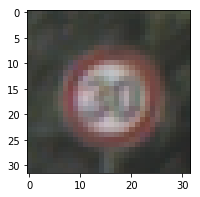

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

#Print a single sign
sign_number = 2377
print( y_train[sign_number])
img = np.array(X_train[sign_number])
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.show()

Sorted classes:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


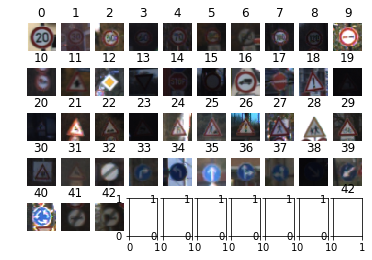

In [5]:
### Plot all signs

### Get the labels and print them
sorted_classes = sorted(set(train['labels']))
print('Sorted classes:')
print(sorted_classes)

zip_train = zip(X_train, y_train)
img_dict = {}
fig = plt.figure()

### Find one image pr label and print them
for img, label in zip_train:
    if img_dict.get(label) is None:
        img_dict[label] = img
        
row = 0
col = 0

plt.figure(figsize=(2,2))
f, axarr = plt.subplots(5,10)
for k in sorted(img_dict):
    plt.title(k)
#    axarr[row, col].imshow(np.fliplr(np.array(img_dict[k])))
    axarr[row, col].imshow(np.array(img_dict[k]))
    axarr[row, col].set_title(k)
    axarr[row, col].axis('off')
    if col == 9:
        col = 0
        row += 1
    else:
        col += 1

plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

plt.show()

### Print 100 images of the same sign in a 10 x 10 plot matrix

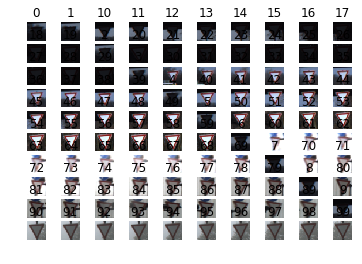

In [6]:
def print_k_images_for_label(sign_no, k):
    zip_train = zip(X_train, y_train)
    img_dict = {}
    cnt = 0
    ### Find 100 image pr label and print them
    for img, label in zip_train:
#        print(label)
        if int(label) == sign_no:
            img_dict[str(cnt)] = img
            cnt += 1
        if cnt >= k:
            break
    return img_dict


sign_no = 13 # Yield signs
img_dict = print_k_images_for_label(sign_no, 100)
#print(img_dict.keys())

plt.figure(figsize=(1,1))
f, axarr = plt.subplots(10,10)
row = 0
col = 0
for k in sorted(img_dict):
#    plt.figure(figsize=(1,1))
#    plt.title(k)
#    axarr[row, col].imshow(np.fliplr(np.array(img_dict[k])))
    axarr[row, col].imshow(np.array(img_dict[k]))
    axarr[row, col].set_title(k)
    axarr[row, col].axis('off')
    if col == 9:
        col = 0
        row += 1
    else:
        col += 1

plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

plt.show()

## Save 32x32 png images of all signs in a data set
### the code here show how to make copies of all Yield signs (label=13) for visual inspection

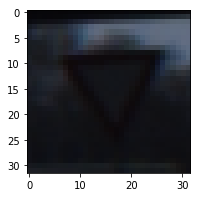

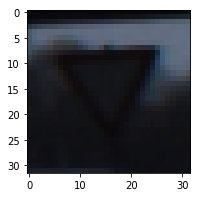

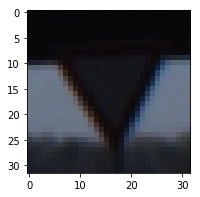

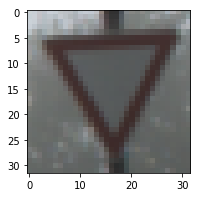

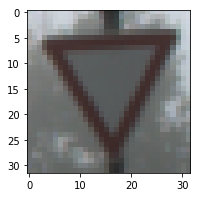

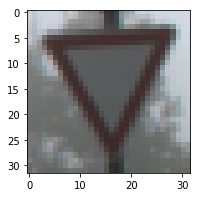

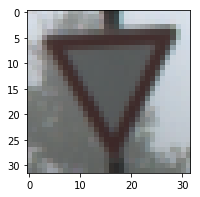

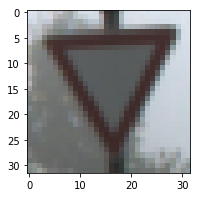

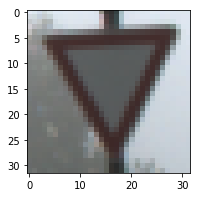

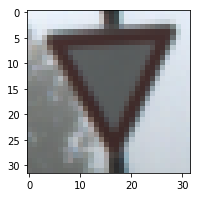

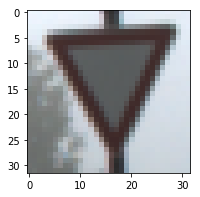

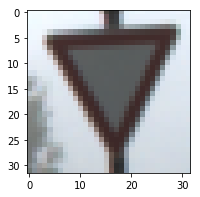

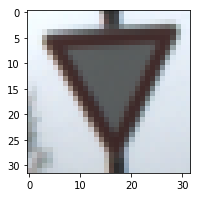

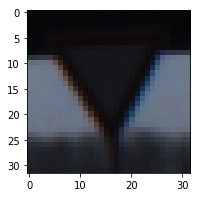

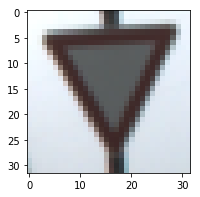

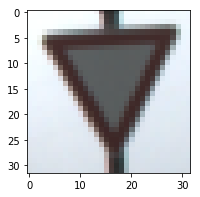

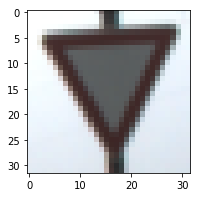

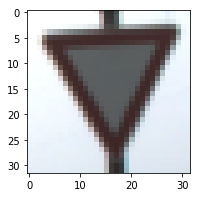

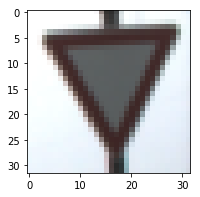

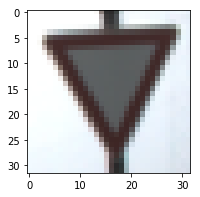

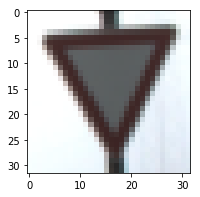

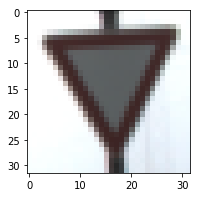

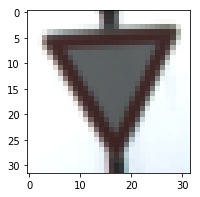

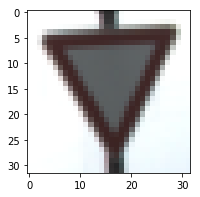

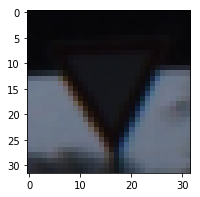

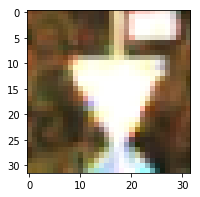

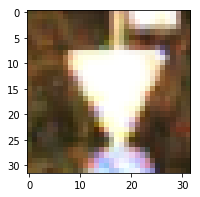

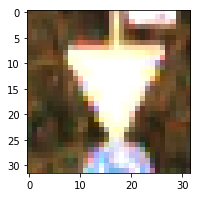

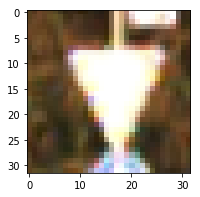

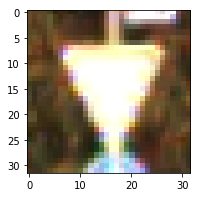

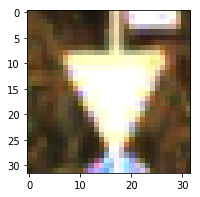

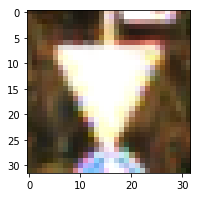

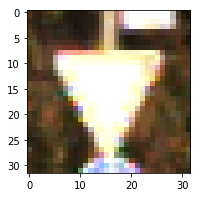

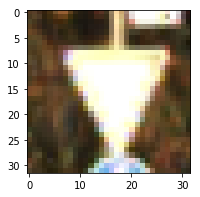

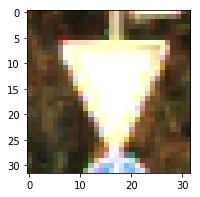

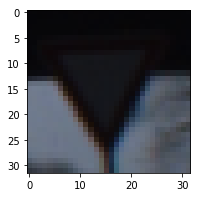

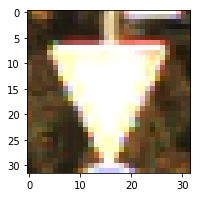

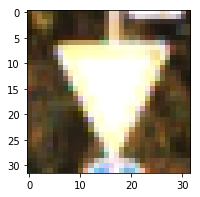

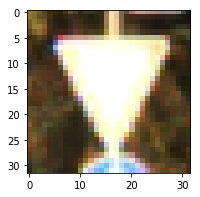

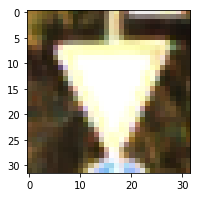

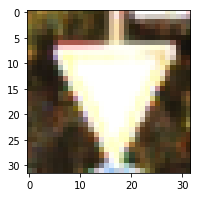

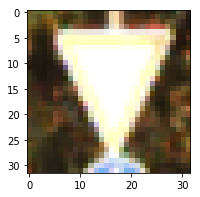

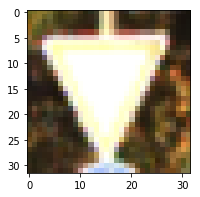

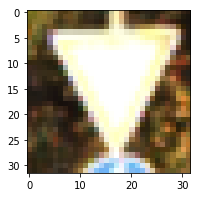

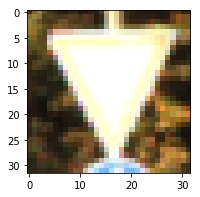

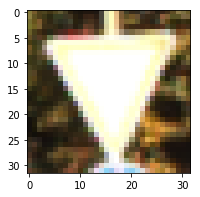

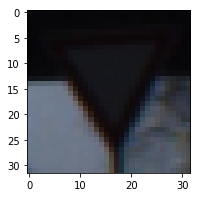

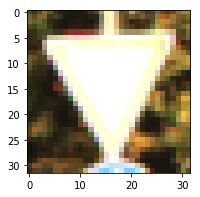

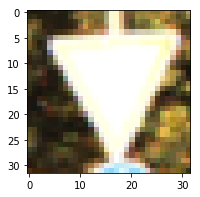

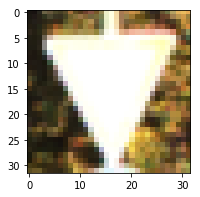

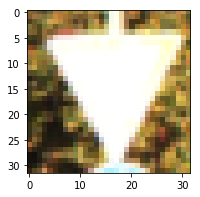

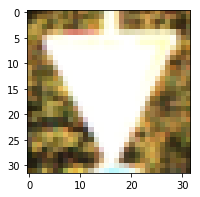

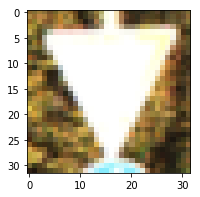

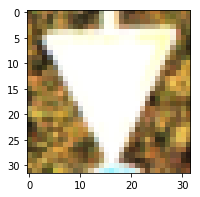

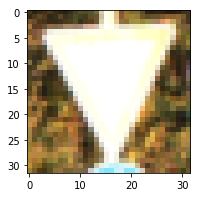

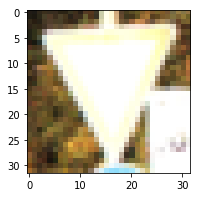

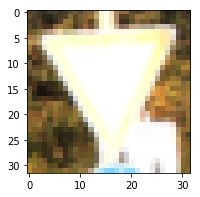

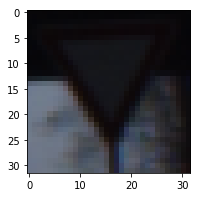

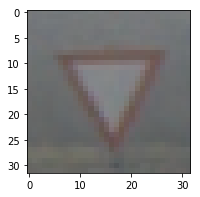

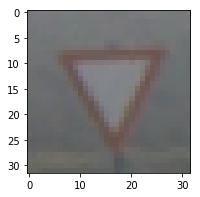

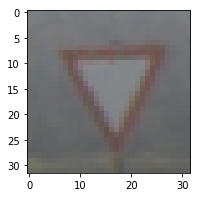

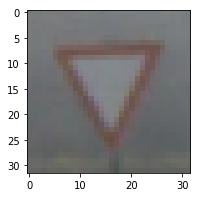

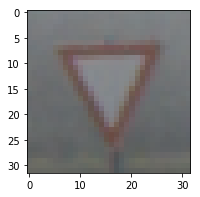

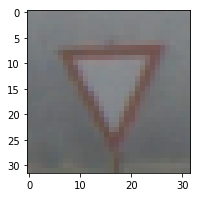

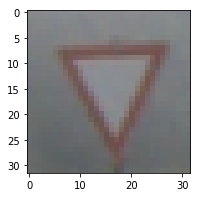

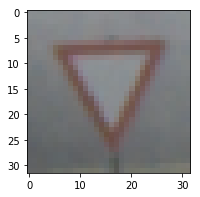

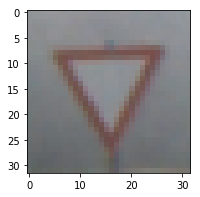

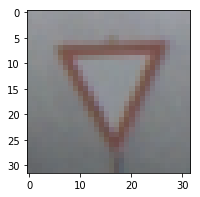

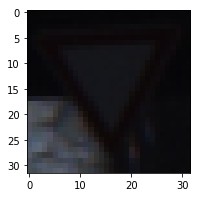

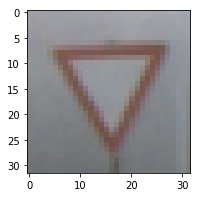

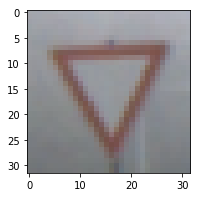

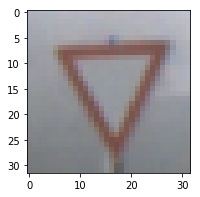

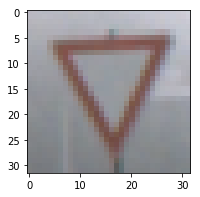

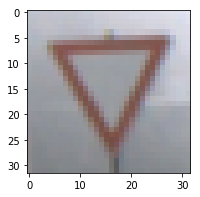

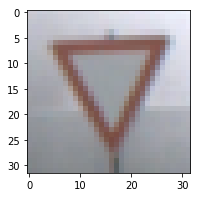

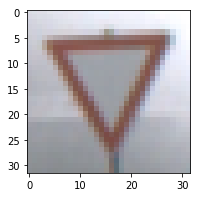

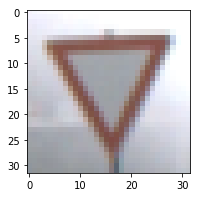

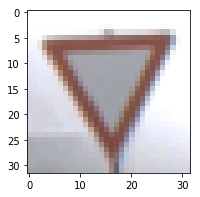

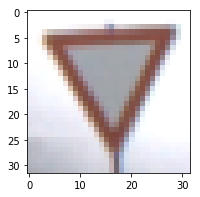

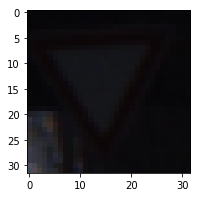

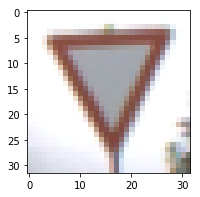

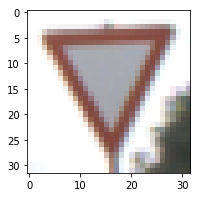

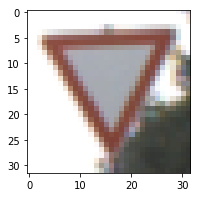

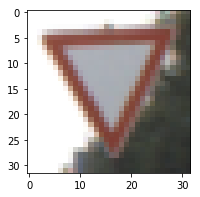

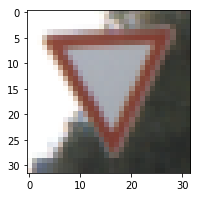

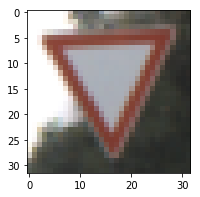

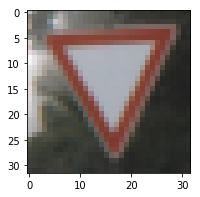

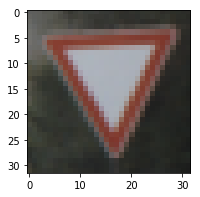

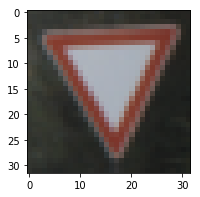

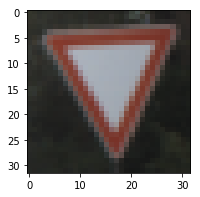

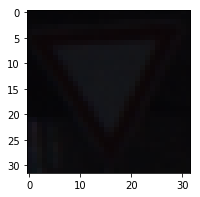

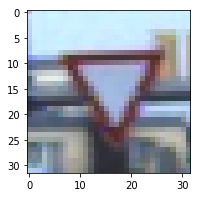

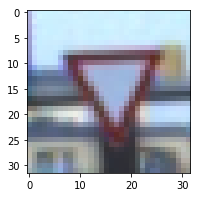

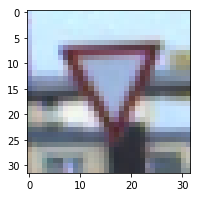

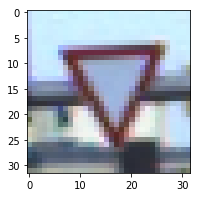

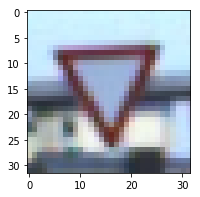

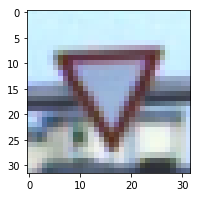

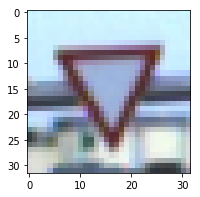

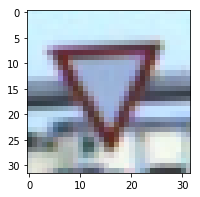

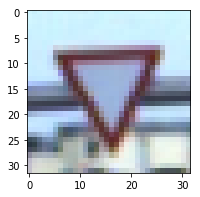

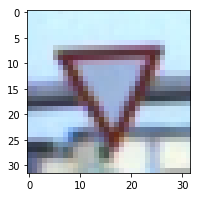

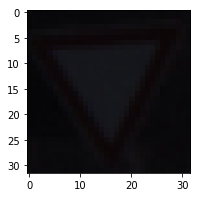

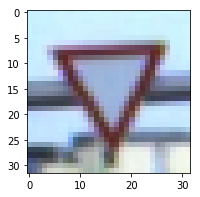

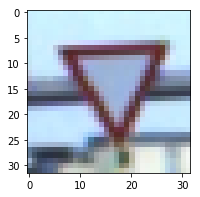

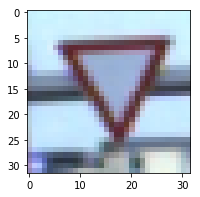

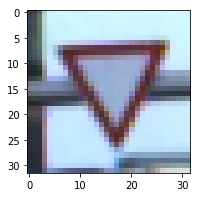

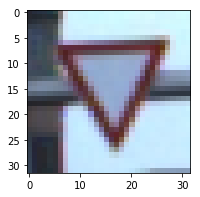

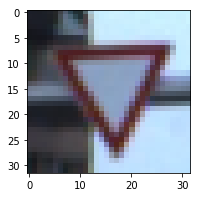

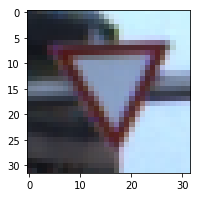

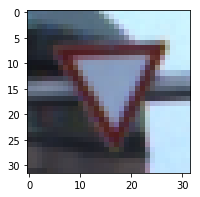

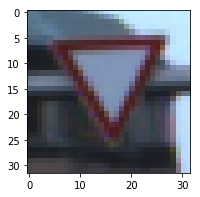

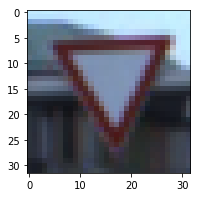

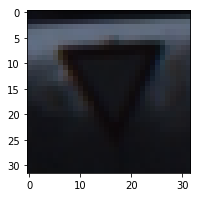

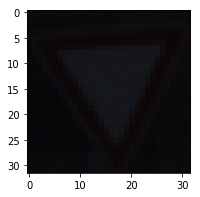

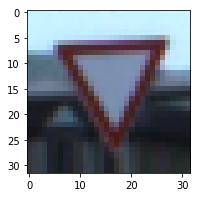

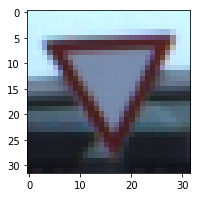

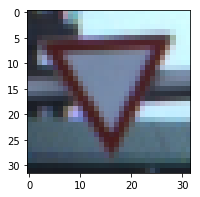

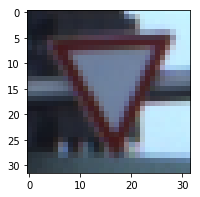

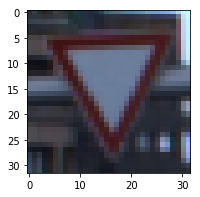

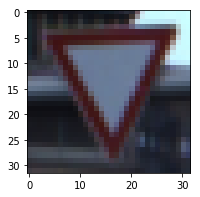

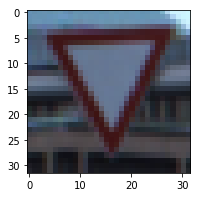

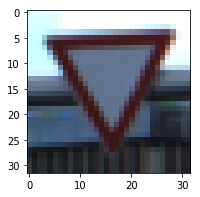

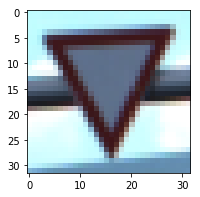

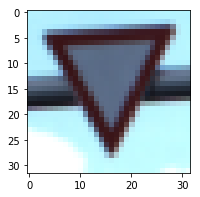

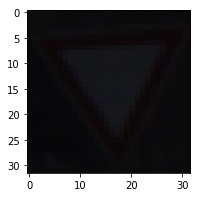

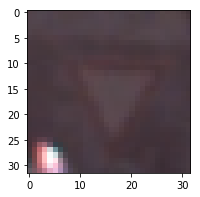

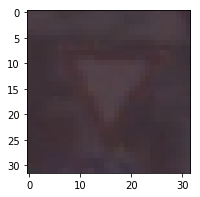

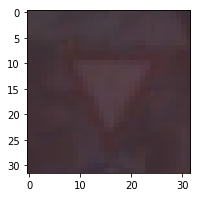

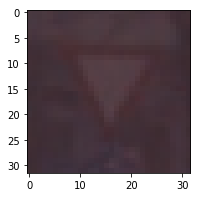

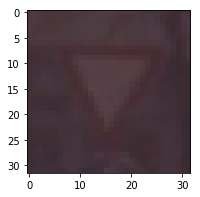

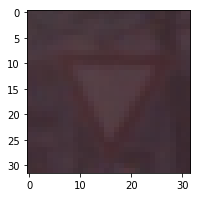

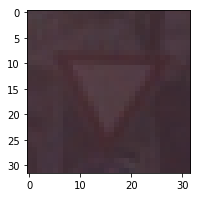

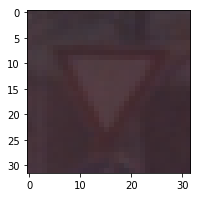

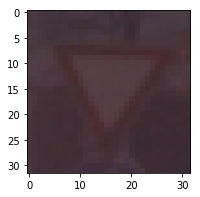

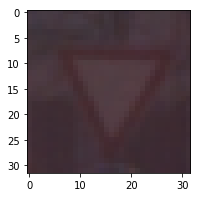

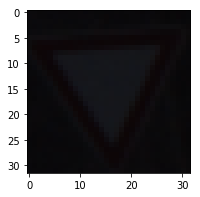

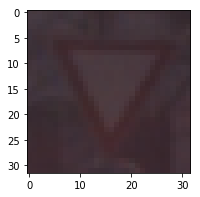

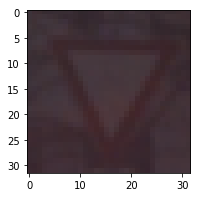

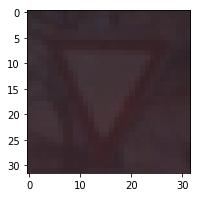

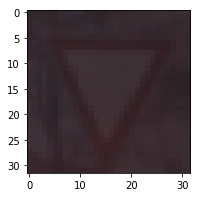

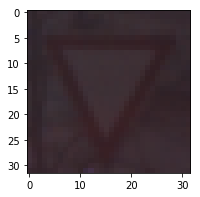

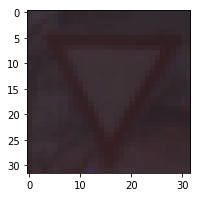

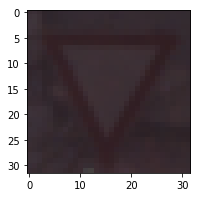

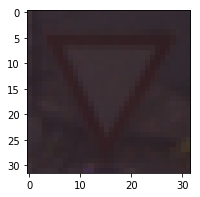

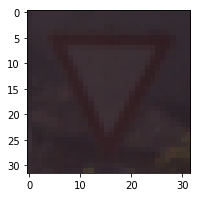

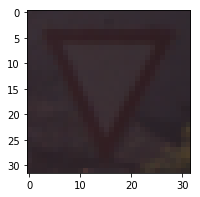

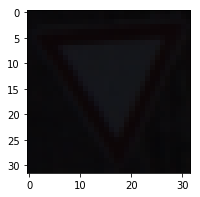

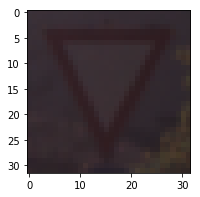

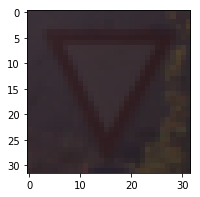

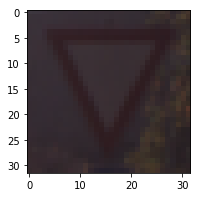

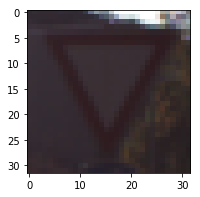

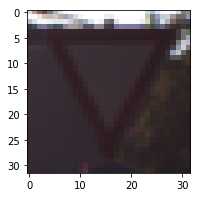

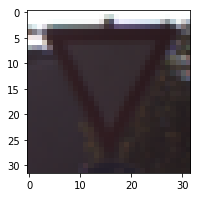

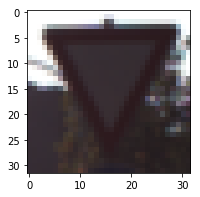

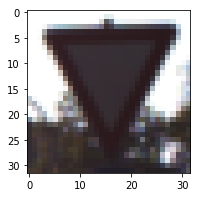

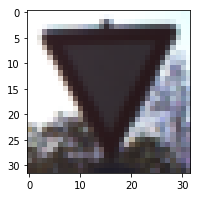

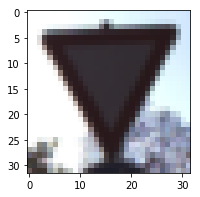

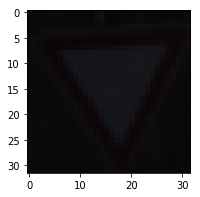

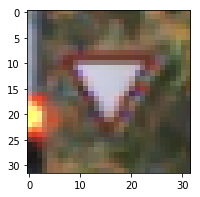

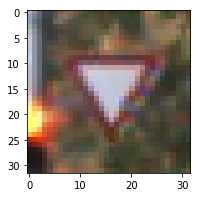

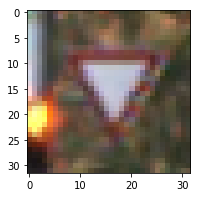

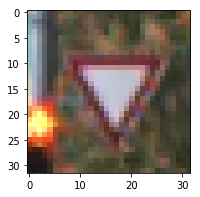

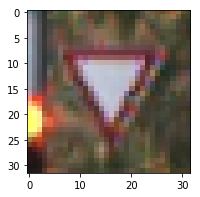

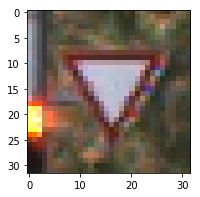

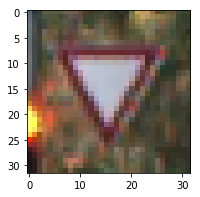

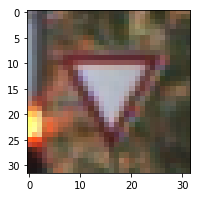

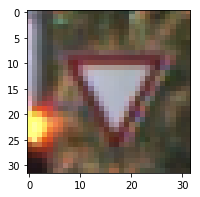

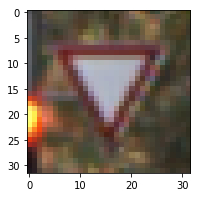

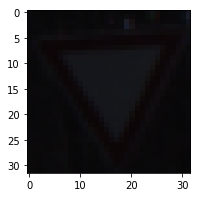

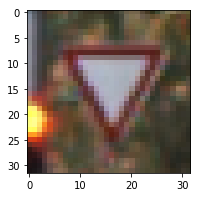

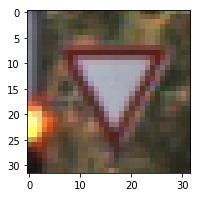

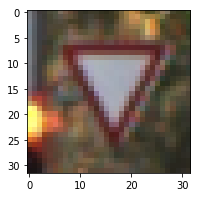

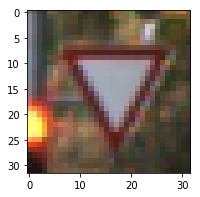

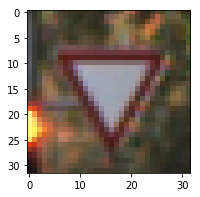

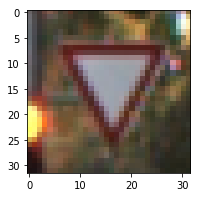

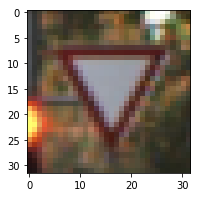

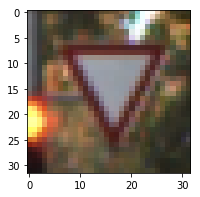

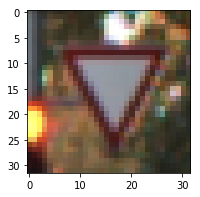

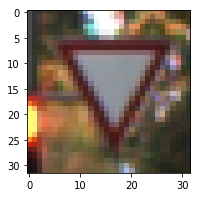

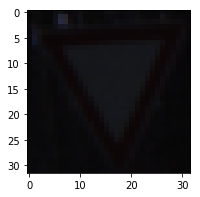

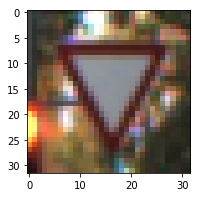

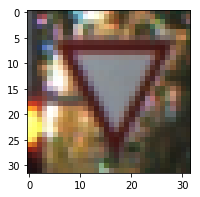

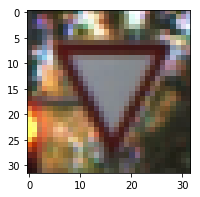

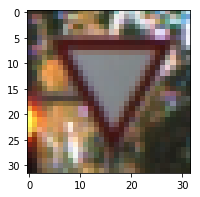

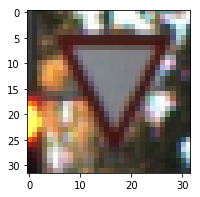

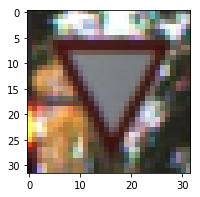

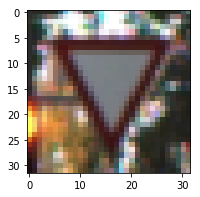

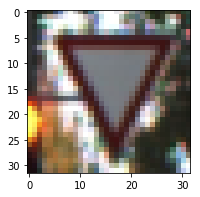

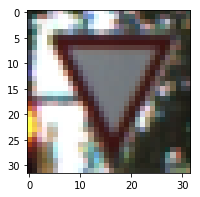

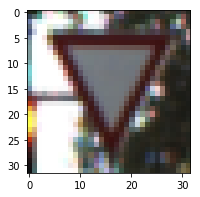

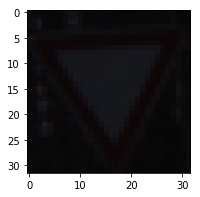

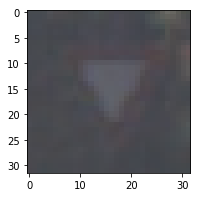

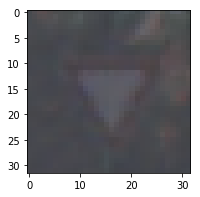

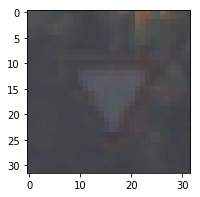

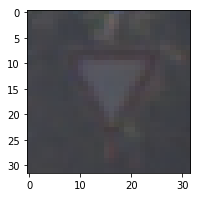

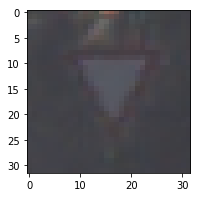

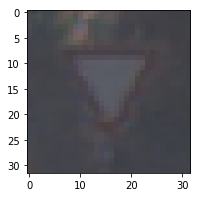

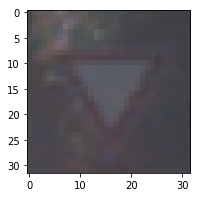

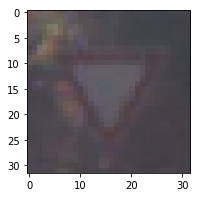

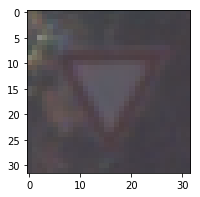

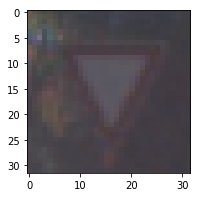

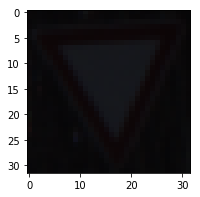

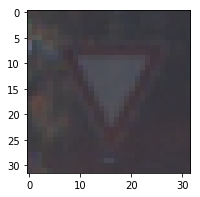

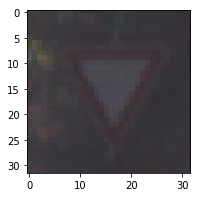

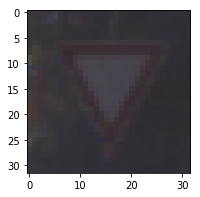

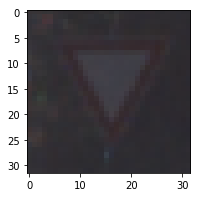

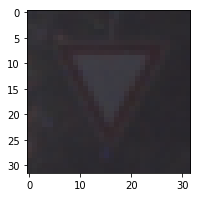

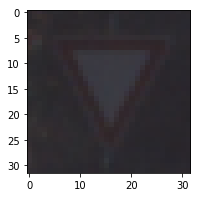

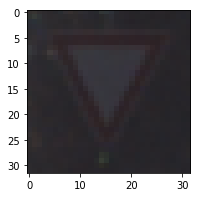

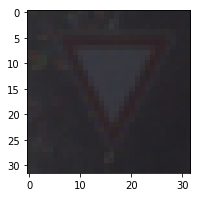

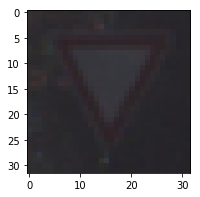

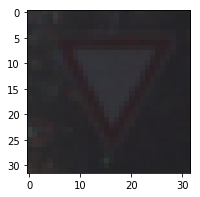

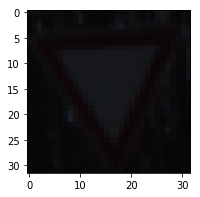

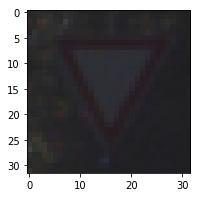

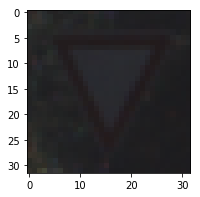

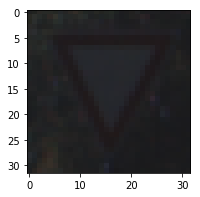

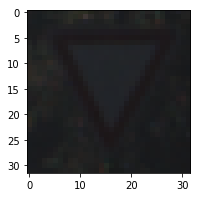

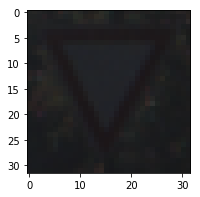

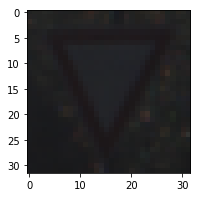

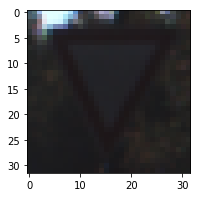

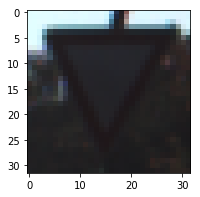

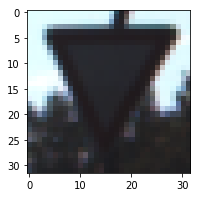

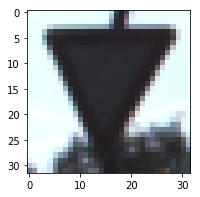

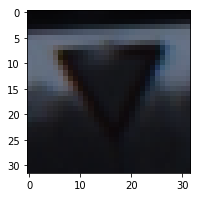

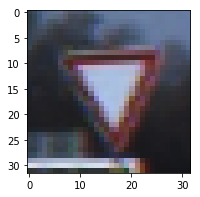

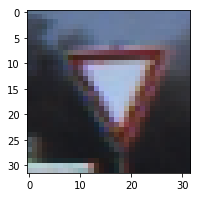

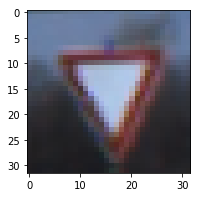

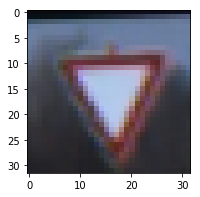

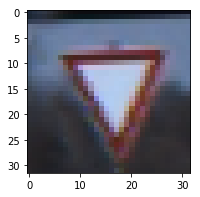

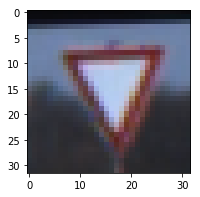

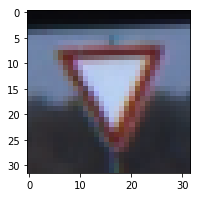

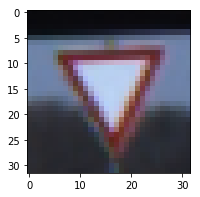

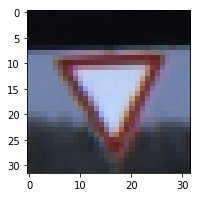

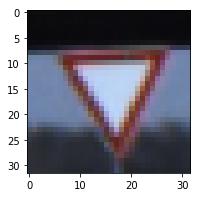

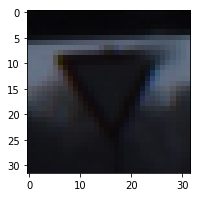

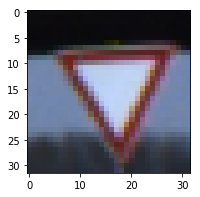

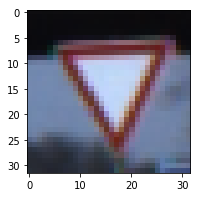

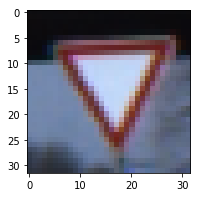

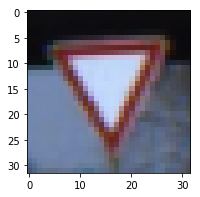

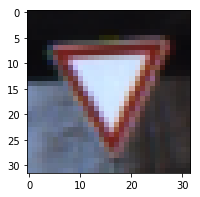

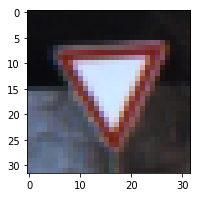

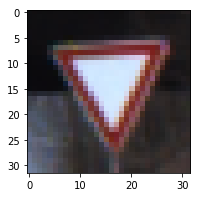

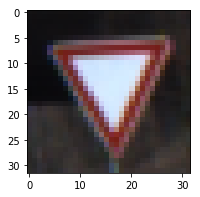

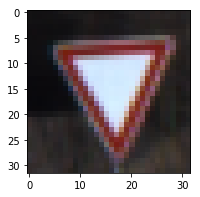

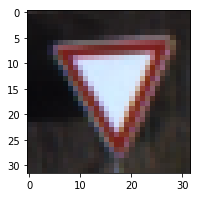

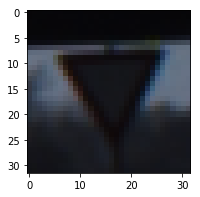

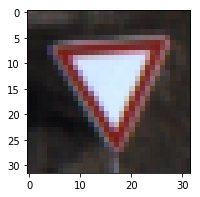

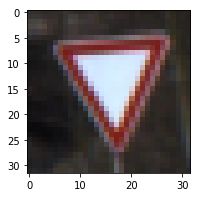

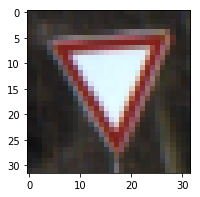

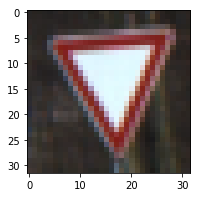

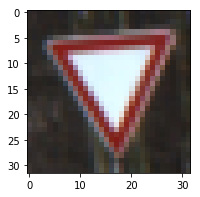

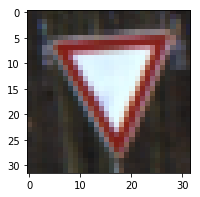

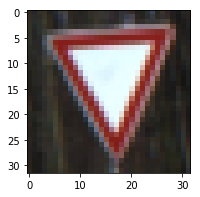

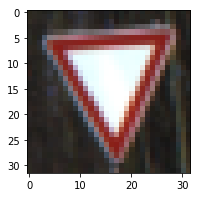

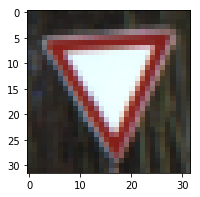

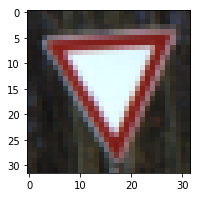

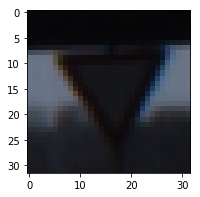

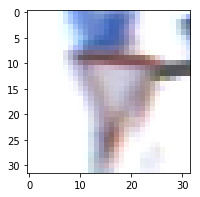

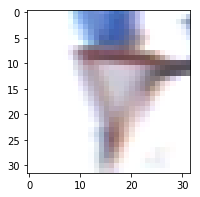

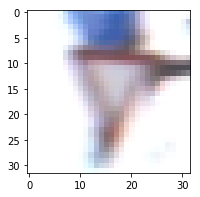

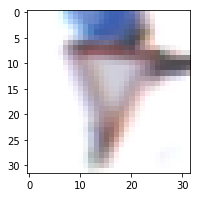

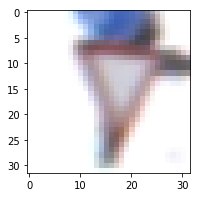

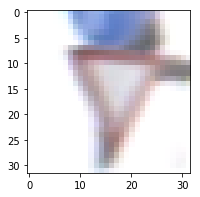

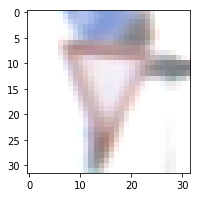

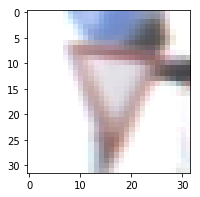

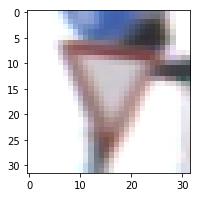

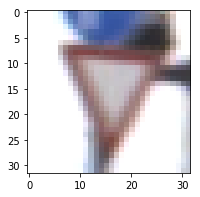

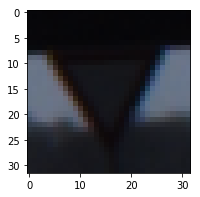

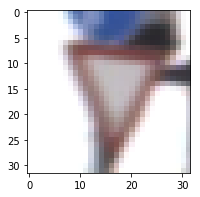

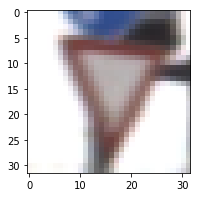

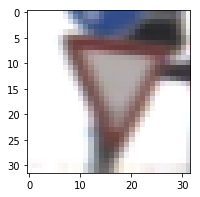

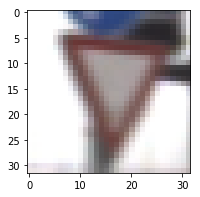

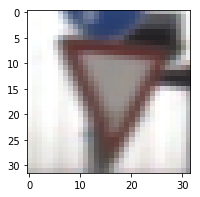

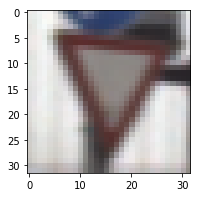

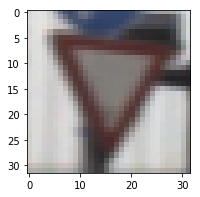

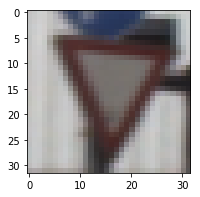

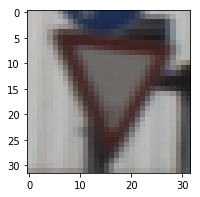

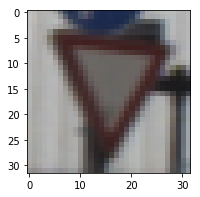

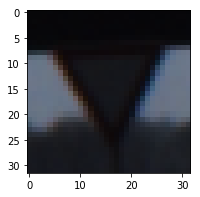

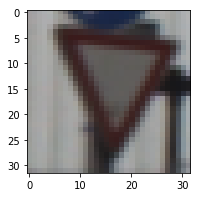

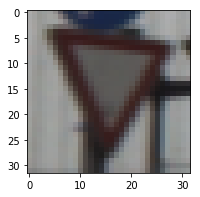

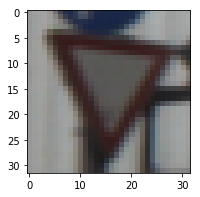

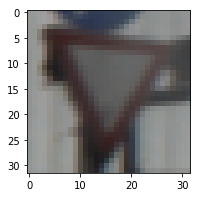

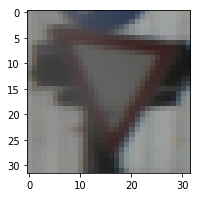

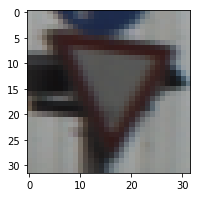

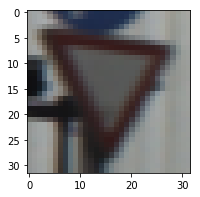

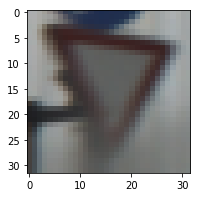

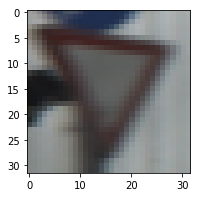

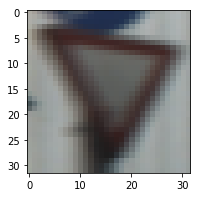

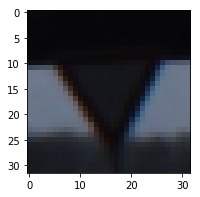

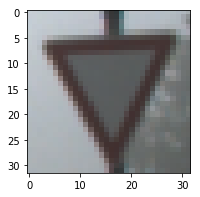

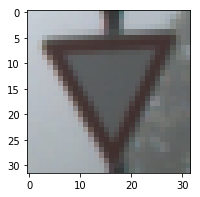

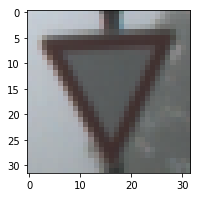

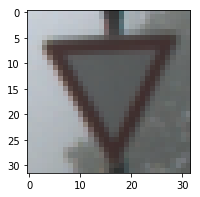

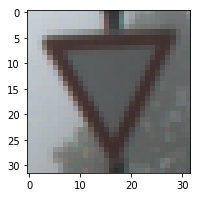

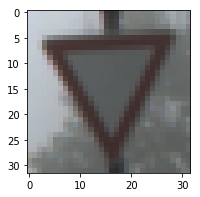

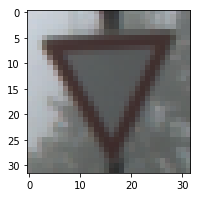

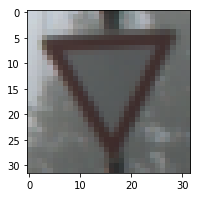

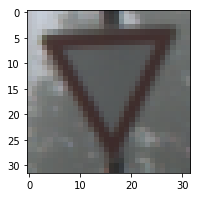

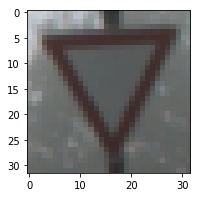

In [7]:
sign_no = 13 # Yield signs
img_dict = print_k_images_for_label(sign_no, 300)
#print(img_dict.keys())

cnt = 0
for k in sorted(img_dict):
    plt.figure(figsize=(3,3))
    plt.imshow(img_dict[k])
    plt.imsave("Yield_signs/Yield_sign_valid_"+str(cnt)+".png",img_dict[k])
    plt.show()
    cnt += 1


## Function to create a bar plot

In [8]:
# plot a bar plot
def barplot(unique, count, title):
    plt.rcParams['figure.figsize'] = [20.0, 6.0]
    axes = plt.gca()
    axes.set_xlim([-1,43])
    plt.bar(unique, counts, tick_label=unique, align='center')
    plt.title(title)
    plt.savefig('Plots/' + title + ' nov17.png')
    plt.show()


## Make barplots showing the number of labels in the training, validation, and test data sets

Training data


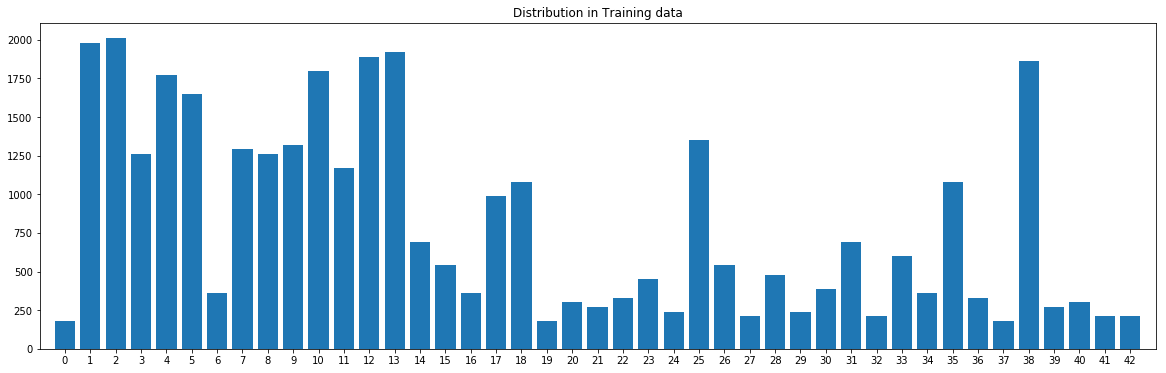

 
Valid data


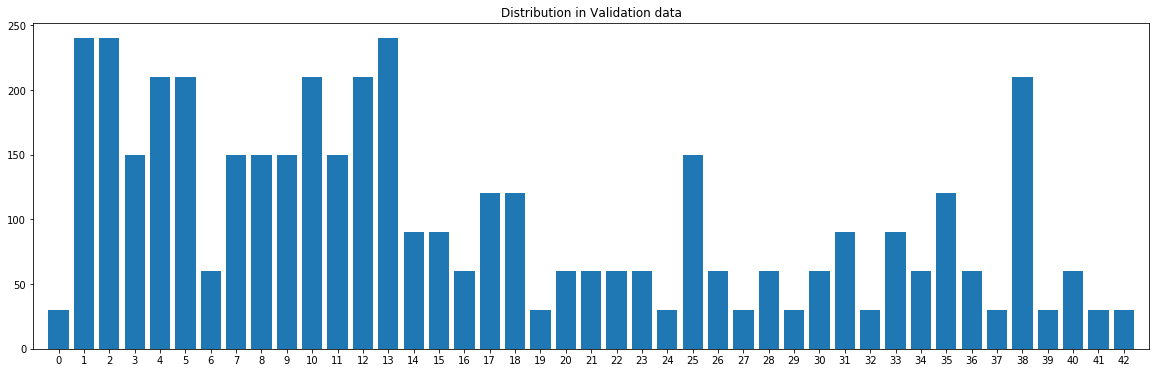

 
Test data


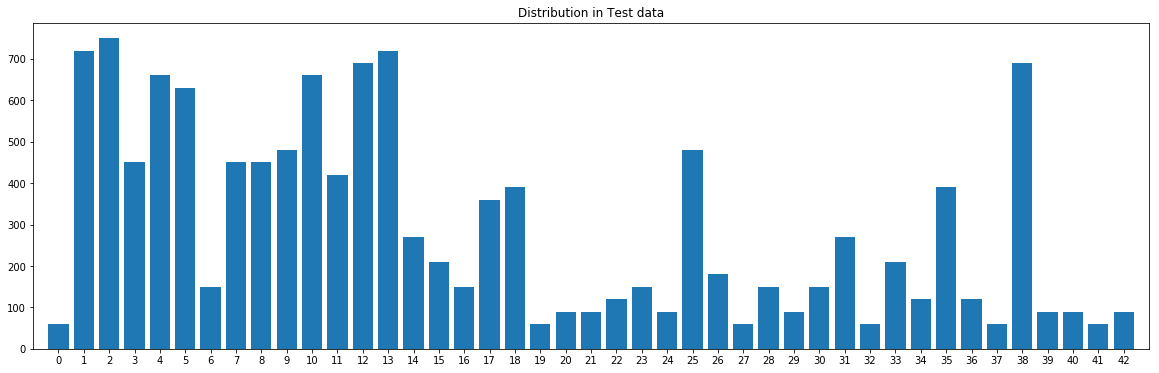

In [9]:
# How many signs are there of each label?
# Print the counts for all three data sets


s = np.array(y_train)
unique, counts = np.unique(s, return_counts=True)
print('Training data')
barplot(unique, counts, 'Distribution in Training data')
#print (np.asarray((unique, counts)).T)
print (' ')
s = np.array(y_valid)
unique, counts = np.unique(s, return_counts=True)
print('Valid data')
barplot(unique, counts, 'Distribution in Validation data')
#print (np.asarray((unique, counts)).T)
print (' ')
s = np.array(y_test)
unique, counts = np.unique(s, return_counts=True)
print('Test data')
barplot(unique, counts, 'Distribution in Test data')
#print (np.asarray((unique, counts)).T)
print (' ')


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Preproceesing images has been implemented in this project.
It didn't happend until late into the project, as increased depth in convoluted layers and using Drop-Out has dramatically improved the overall performance of the model. Accuracy actually dropped approx. 2% after adding 35.000+ images from rotated and translated original images.

In [10]:

### Code examples

#Image ajusting
#(https://stackoverflow.com/questions/39767612/what-is-the-equivalent-of-matlabs-imadjust-in-python)


def hisEqual(img):
    return cv2.equalizeHist(img)

def hisEqualColor(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    channels = cv2.split(ycrcb)
    cv2.equalizeHist(channels[0], channels[0])
    cv2.merge(channels, ycrcb)
    cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR, img)
    return img

# Other augmentation methods
    # Scaling
    # Translation
    # Rotation (at 90 degrees)
    # Rotation (at finer angles)
    # Flipping
    # Adding Salt and Pepper noise
    # Lighting condition
    # Perspective transform
    # Grayscaling
    
# inspired by code implemented by George Sung, GitHub, Traffic Sign Classification, november 2016
def rotate_and_translate(img, angle, translation):
    height, width, channels = img.shape
    
    # rotate
    center = (width//2, height//2)
    angle_random = np.random.uniform(-angle, angle)
    rotation_mat = cv2.getRotationMatrix2D(center, angle_random, 1)
    new_img = cv2.warpAffine(img, rotation_mat, (width, height))
    
    # translate
    x_offset = translation * width * np.random.uniform(-1,1)
    y_offset = translation * height * np.random.uniform(-1,1)
    translation_mat = np.array([[1, 0, x_offset], [0, 1, y_offset]])
    new_img = cv2.warpAffine(new_img, translation_mat, (width, height))
    
    return new_img
    
# Rotation at 90 degrees and Flipping are not well suited for traffic signs due to their normal orientation.
# It is a bad idea to learn about e.g. a speed limit sign that has reversed text or is upside down.
# Flipping could easily be done using numpy.flipud and numpy.fliplr

# If image augmentation must be applied, I would choose to focus on adjusting color and contrast,
# grayscaling and some lightning condition adjustments.

#(https://medium.com/ymedialabs-innovation/data-augmentation-techniques-in-cnn-using-tensorflow-371ae43d5be9)

## Perform data augmentation, only performed on training data.
The augmented data were generated only once (they took 46 minutes on a large Mac Pro to generate),saved to a pickle file and read into the flow afterwards.

In [11]:

def perform_data_aug(new_file_name):
    orig_X = X_train
    orig_y = y_train

    ANGLE = 15
    TRANSLATION = 0.2
    i = 0

    zip_train = zip(orig_X, orig_y)
    print('Augmenting data start')
    print(time.ctime())
    print()

    ### Find one image pr label and process it
    ### Rotate and transform and eqalize histogram
    for img, label in zip_train:
        new_img = rotate_and_translate(img, ANGLE, TRANSLATION)
        if i == 0:
            new_X = np.expand_dims(new_img, axis=0)
            new_y = np.array(label)
        else:
            new_X = np.concatenate((new_X, np.expand_dims(new_img, axis=0)))
            new_y = np.append(new_y, label)
            
        i += 1
        if i % 1000 == 0:
            print('%d new images generated' % i)
    
    new_X = np.concatenate((orig_X, new_X))
    new_y = np.concatenate((orig_y, new_y))
    
    #write data to picklefile
    new_data = {'features': new_X, 'labels': new_y}
    with open(new_file_name, mode='wb') as f:
        pickle.dump(new_data, f)
    
    print('Augmentation stopped')
    print(time.ctime())
    print()
    
    return i, new_data

### create augmented dataset
### only run this once and load the saved pickle file instead afterwards

#num_new_images, train_aug = perform_data_aug('train_aug.p')

### load augmented data

augmented_training_file = "train_aug.p"

with open(augmented_training_file, mode='rb') as f:
    train = pickle.load(f)
X_train, y_train = train['features'], train['labels']

print('Size of augmented image train data set: %d' % len(train['features']))

Size of augmented image train data set: 69598


## Create barplot of augmented data set

Augmented training data


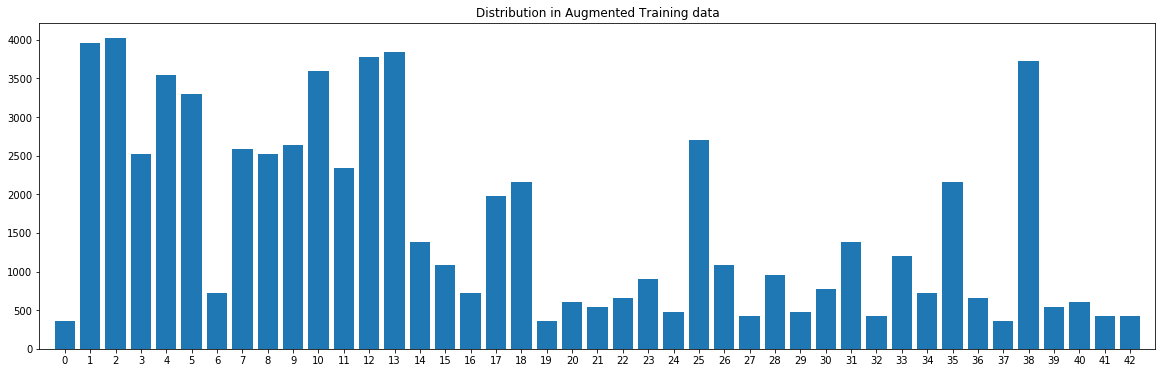

In [12]:

s = np.array(y_train)
unique, counts = np.unique(s, return_counts=True)
print('Augmented training data')
barplot(unique, counts, 'Distribution in Augmented Training data')


### Shuffle and normalize the images
The suggested approach of using the formula (data - 128) / 128 stopped the model perf. at 0.753. 


In [13]:
def img_normalize(data):
    return (data / 122.5) - 1

### Shuffle the data

X_train, y_train = shuffle(X_train, y_train)

### Normalize data

### This suggested approach was bad as the performance of the model didn't exceed more than 0.753
#X_train = (X_train - 128) / 128
#X_valid = (X_valid - 128) / 128
#X_test  = (X_test - 128) / 128

### This formula for normalizing the images, combined with two Drop-Outs, boosted the model up to 0.961 :-)
### Formula from Discussions SDCND Term 1 no. 236031
X_train = img_normalize(X_train)
X_valid = img_normalize(X_valid)
X_test  = img_normalize(X_test)



### Model Architecture


## The architecture used in this project
The original LeNet-5 with twice as deep convolution layers and two Drop-Outs.

3x32x32-C12-MP2-C32-MP2-120N-DO-84N-DO-43N, with Relu activations


In [14]:
### Implementation of the LeNet-5 neural network architecture.
### (http://yann.lecun.com/exdb/lenet/)

# here with twice as deep convulution layers and two Drop-Out layers


def LeNet2(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID', name='conv1') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID', name='conv2') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 800. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # DropOuts
    fc1 = tf.nn.dropout(fc1, keep_prob1)


    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # DropOuts
    fc2 = tf.nn.dropout(fc2, keep_prob2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.nn.bias_add(tf.matmul(fc2, fc3_W), fc3_b, name='logits')
    
    return logits

## TODO - the next network to implement :-)

#### Simplified implementation of the Multi-column Deep Neural Network architecture.
Ciresan, Meier and Schmidhuber, Technical Report No. IDSIA-04-12, February 2012
(https://arxiv.org/pdf/1202.2745.pdf)

#### Architecture
3x48x48-100C7-MP2-150C4-150MP2-250C4-250MP2-300N-43N, with Tanh activations

- - - - 

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Training Pipeline
Create a training pipeline that uses the AdamOptimizer.


In [15]:
logits = LeNet2(x)
one_hot_y = tf.one_hot(y, 43)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation
Evaluate how well the loss and accuracy of the model for the given dataset.


In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

#(code adjusted with help from subodh.malgode on https://discussions.udacity.com/../232468/26)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob1: 1.0, keep_prob2: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_loss / num_examples, total_accuracy / num_examples

### Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.


Training 69598 examples...
Training for 10 epochs.
Fri Nov 24 19:52:04 2017

EPOCH 1 ...
Fri Nov 24 20:01:21 2017
  Validation Accuracy = 0.623
  Validation Loss = 1.230

EPOCH 2 ...
Fri Nov 24 20:03:13 2017
  Validation Accuracy = 0.761
  Validation Loss = 0.766

EPOCH 3 ...
Fri Nov 24 20:05:02 2017
  Validation Accuracy = 0.869
  Validation Loss = 0.478

EPOCH 4 ...
Fri Nov 24 20:06:52 2017
  Validation Accuracy = 0.900
  Validation Loss = 0.347

EPOCH 5 ...
Fri Nov 24 20:08:43 2017
  Validation Accuracy = 0.916
  Validation Loss = 0.308

EPOCH 6 ...
Fri Nov 24 20:10:34 2017
  Validation Accuracy = 0.922
  Validation Loss = 0.268

EPOCH 7 ...
Fri Nov 24 20:12:24 2017
  Validation Accuracy = 0.941
  Validation Loss = 0.224

EPOCH 8 ...
Fri Nov 24 20:14:13 2017
  Validation Accuracy = 0.941
  Validation Loss = 0.197

EPOCH 9 ...
Fri Nov 24 20:16:02 2017
  Validation Accuracy = 0.944
  Validation Loss = 0.192

EPOCH 10 ...
Fri Nov 24 20:17:51 2017
  Validation Accuracy = 0.947
  Validat

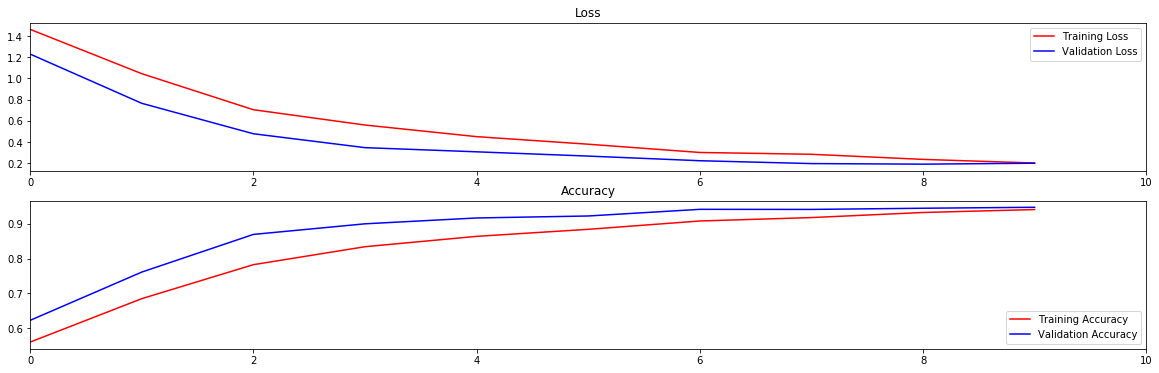

In [17]:

with tf.Session() as sess:
    training_accuracy = []
    training_loss = []
    validation_accuracy = []
    validation_loss = []

    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training " + str(num_examples) + " examples...")
    print("Training for " + str(EPOCHS) + " epochs.")
    print(time.ctime())
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1: 0.5, keep_prob2: 0.5})
            
        val_loss, val_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy.append(val_accuracy)
        validation_loss.append(val_loss)
        
        train_loss, train_accuracy = evaluate(X_train, y_train)
        training_accuracy.append(train_accuracy)
        training_loss.append(train_loss)
        
        print("EPOCH {} ...".format(i+1))
        print(time.ctime())
        print("  Validation Accuracy = {:.3f}".format(val_accuracy))
        print("  Validation Loss = {:.3f}".format(val_loss))
        print()
        
    saver.save(sess, './lenet2')
    print("Model saved")
    
    loss_plot = plt.subplot(2,1,1)
    loss_plot.set_title('Loss')
    loss_plot.plot(training_loss, 'r', label='Training Loss')
    loss_plot.plot(validation_loss, 'b', label='Validation Loss')
    loss_plot.set_xlim([0, EPOCHS])
    loss_plot.legend(loc=1)
    
    loss_plot = plt.subplot(2,1,2)
    loss_plot.set_title('Accuracy')
    loss_plot.plot(training_accuracy, 'r', label='Training Accuracy')
    loss_plot.plot(validation_accuracy, 'b', label='Validation Accuracy')
    loss_plot.set_xlim([0, EPOCHS])
    loss_plot.legend(loc=4)
    
    plt.savefig('Plots/Training_Validation_Loss_Accuracy_CNN_CHR_nov17.png')
    plt.show()
    

### Evaluate the Model
When the model is performing with satisfying result, the performance of the model must be evaluated on the test set.

This must be done only once!

The reason for this is, that if you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.


In [18]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_loss, test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet2
Test Accuracy = 0.939


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load, Resize and Output the Images

In [19]:
def resize_images(X_img_file_paths):
    X_data = []
    for index, file_path in enumerate(X_img_file_paths):
        img = mpimg.imread(file_path)[:, :, :3] # Do not read alpha channel.
        (h, w) = img.shape[:2]
        resized_img = cv2.resize(img,(IMAGE_SIZE, IMAGE_SIZE), interpolation = cv2.INTER_AREA)
        X_data.append(resized_img)

    X_data = np.array(X_data, dtype = np.float32) # Convert to numpy
    return X_data


#### Images from Google StreetView, downtown Hamburg, Germany

(32, 32, 3)


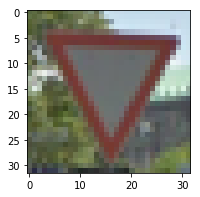

(32, 32, 3)


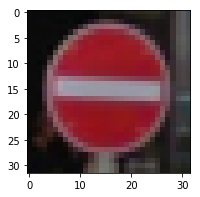

(32, 32, 3)


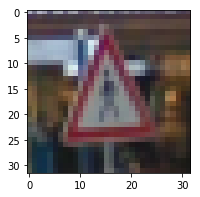

(32, 32, 3)


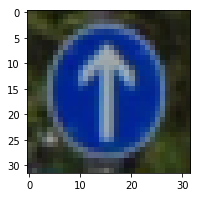

(32, 32, 3)


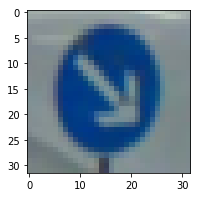

In [20]:
### Load the images and plot them.

img1 = "Extra_Signs/13_Yield_Hamburg.png"
img2 = "Extra_Signs/17_No_entry_Hamburg.png"
img3 = "Extra_Signs/27_Pedestrians_Hamburg.png"
img4 = "Extra_Signs/35_Ahead_only_Hamburg.png"
img5 = "Extra_Signs/38_Keep_right_Hamburg.png"
#img6 = "Extra_Signs/13_Yield_Hamburg_2.png"
#img7 = "Extra_Signs/38_Keep_right_Hamburg_2.png"

img_list = [img1,img2,img3,img4,img5]

x_new_images = []
x_new_images = resize_images(img_list)

# Labels
y_new_images = np.array([13,17,27,35,38])

# Plot the images
for img in x_new_images:
    print(img.shape)
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.show()


### Normalize the new images


In [21]:
x_new_norm_images = img_normalize(x_new_images)

### Predict the Sign Type for Each Image

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#import tensorflow as tf


with tf.Session() as sess:
    print("Evaluating new images ...")
    print(time.ctime())
    print()
    new_sawer = tf.train.import_meta_graph('lenet2.meta')
    new_sawer.restore(sess, tf.train.latest_checkpoint('.'))
    
    # access tensors by name
    x      = tf.get_default_graph().get_tensor_by_name("x:0")
    logits = tf.get_default_graph().get_tensor_by_name("logits:0")
    keep_prob1 = tf.get_default_graph().get_tensor_by_name("keep_prob1:0")
    keep_prob2 = tf.get_default_graph().get_tensor_by_name("keep_prob2:0")
    
    feed_dict = {x:x_new_norm_images, keep_prob1:1.0, keep_prob2:1.0}
#    predictSoftmax = tf.nn.softmax(logits)
#    predicted_logits = sess.run(predictSoftmax, feed_dict)
    predicted_logits = sess.run(logits, feed_dict)
    predicted_labels = np.argmax(predicted_logits, axis=1)
    print(predicted_logits.shape)
    print(predicted_labels)
    
    print(time.ctime())
    print()


Evaluating new images ...
Fri Nov 24 20:21:58 2017

INFO:tensorflow:Restoring parameters from ./lenet2
(5, 43)
[1 1 1 1 1]
Fri Nov 24 20:21:59 2017



### Analyze Performance

In [23]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    print("Evaluating new images ...")
    print(time.ctime())
    print()
    new_sawer = tf.train.import_meta_graph('lenet2.meta')
    new_sawer.restore(sess, tf.train.latest_checkpoint('.'))

    val_loss, val_accuracy = evaluate(x_new_norm_images, y_new_images)
        
    print(time.ctime())
    print()
    print("  Validation Accuracy = {:.3f}".format(val_accuracy))
    print()


Evaluating new images ...
Fri Nov 24 20:22:18 2017

INFO:tensorflow:Restoring parameters from ./lenet2
Fri Nov 24 20:22:19 2017

  Validation Accuracy = 0.000



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [24]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

""" Compute softmax on numpy array for each set of scores in predictions"""
def softmax(predictions):
    return np.exp(predictions) /np.sum(np.exp(predictions), axis = 1, keepdims = True)

with tf.Session() as sess:
    softmax_probabilities = softmax(predicted_logits)

    top_k_val, top_k_idx = tf.nn.top_k(softmax_probabilities, k=5)
    top_k_vals, top_k_idxs = sess.run([top_k_val, top_k_idx], feed_dict={logits: predicted_logits})
    
    print('Labels for the signs')
    print(y_new_images)
    print()
    print('Top 5 lables found by CNN')
    print(top_k_idxs)
    print()
    print('Top 5 softmax probabilities (pct) for the 5 signs')
    print(top_k_vals *100)
    #for i in range(5):
    #    print('label ')


Labels for the signs
[13 17 27 35 38]

Top 5 lables found by CNN
[[ 1 18 28 11  5]
 [ 1  2  5 18 28]
 [ 1 28 18  2  5]
 [ 1  5  2 28 18]
 [ 1 18 28  5  2]]

Top 5 softmax probabilities (pct) for the 5 signs
[[ 33.46339798   7.37484837   7.30221176   5.4497633    5.42591572]
 [ 36.96421432   6.83229399   6.65008116   5.65148783   5.53519344]
 [ 35.54141998   7.28324795   6.18253756   5.79951048   5.57856989]
 [ 35.56390762   6.61592054   6.46356583   6.15054607   5.37721825]
 [ 32.59408569   7.08333635   6.93431854   5.99496126   5.49084044]]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [29]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")


#outputFeatureMap(x_new_norm_images[0], 'conv2')